In [63]:
import torch
from torch import nn, optim
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from torcheval.metrics import MulticlassAccuracy
from sklearn.metrics import accuracy_score

In [161]:
# Creating the blobs
def GetData():
    seed = 42
    classes  = 4
    features = 2

    X, y = make_blobs(
        n_samples=1000,
        n_features= features,
        centers=classes,
        cluster_std=1.5,
        random_state=seed

    )
    return X,y

In [162]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [230]:
X,y = GetData()

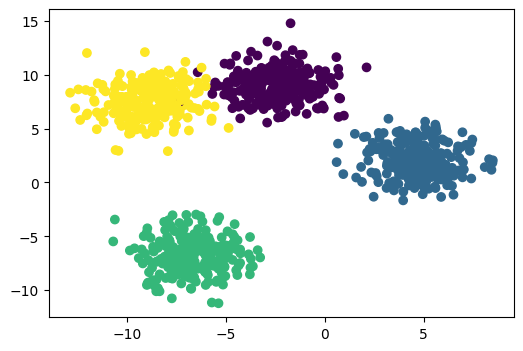

In [180]:
# Visualizing the blobs
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:, 1],c = y)

In [231]:
X = torch.from_numpy(X).type(torch.float).to(device=device)
y = torch.from_numpy(y).type(torch.LongTensor).to(device=device)

In [232]:
y

tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3, 3, 3,
        1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3, 1, 3, 0, 1,
        3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0, 2, 2, 1, 0, 3, 0,
        1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2, 0, 0, 0, 0, 1, 1, 3, 1,
        3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1,
        0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2, 1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3,
        3, 1, 1, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2,
        3, 2, 1, 0, 0, 1, 0, 3, 2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0,
        1, 1, 0, 3, 2, 2, 2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0,
        2, 0, 3, 1, 3, 3, 2, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 1,
        2, 3, 2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3, 1,
        3, 3, 2, 1, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 3, 1, 2, 0, 0, 2,
        0, 3, 3, 0, 2, 2, 2, 0, 2, 2, 2,

In [108]:
X

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        ...,
        [ 3.2158,  5.9217],
        [-7.7939, -7.1606],
        [-9.6816,  7.0097]], device='cuda:0')

In [233]:
# Creating the train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [234]:
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(torch.float32, torch.float32, torch.int64, torch.int64)

In [240]:
# Creating the model
class Classifier(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layers = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 30),
            nn.ReLU(),
            nn.Linear(30, 5),
            nn.LeakyReLU(),
            nn.Linear(5,4)
        )
    def forward(self, x):
        # return torch.argmax(self.layers(x), dim=1).float()
        return self.layers(x)

In [246]:
model = Classifier().to(device=device)
model

Classifier(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=5, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=5, out_features=4, bias=True)
  )
)

In [247]:
with torch.inference_mode():
    preds = model(X_test)

preds

tensor([[ 0.5018, -0.0118,  0.3076,  0.0630],
        [ 0.1200,  0.3417,  0.0882,  0.2308],
        [ 0.6079, -0.0143,  0.2312,  0.0917],
        [ 0.5229,  0.0254,  0.3051,  0.0914],
        [ 0.2259,  0.2782,  0.1988,  0.1930],
        [ 0.0618,  0.3709,  0.0445,  0.2412],
        [ 0.7125, -0.1002,  0.1905,  0.0850],
        [ 0.2264,  0.2847,  0.1794,  0.2045],
        [ 0.3389,  0.1942,  0.2943,  0.1350],
        [ 0.2335,  0.2799,  0.1878,  0.2015],
        [ 0.2186,  0.2919,  0.1625,  0.2125],
        [ 0.5280, -0.0386,  0.3173,  0.0503],
        [ 0.2179,  0.2833,  0.1898,  0.1962],
        [ 0.1950,  0.2960,  0.1696,  0.2020],
        [ 0.1794,  0.3005,  0.1682,  0.1987],
        [ 0.1511,  0.3260,  0.1117,  0.2250],
        [ 0.1119,  0.3458,  0.0822,  0.2322],
        [ 0.3671,  0.2183,  0.2744,  0.1849],
        [ 0.0767,  0.3632,  0.0556,  0.2385],
        [ 0.1302,  0.3369,  0.0962,  0.2289],
        [ 0.1264,  0.3382,  0.0931,  0.2294],
        [ 0.2671,  0.2672,  0.1975

In [248]:
# intializing variables the training loop
optimizer = optim.Adam(model.parameters(), lr = 0.04)
loss_fn = nn.CrossEntropyLoss()
epochs = 100
accuracy_fn = MulticlassAccuracy()

In [249]:
for epoch in range(epochs):
    # training
    model.train()
    y_preds = model(X_train)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    acc = accuracy_fn.update(torch.sigmoid(y_preds).argmax(dim=1), y_train).compute()

    # validation
    model.eval()
    with torch.inference_mode():
        test_preds = model(X_test)
        test_loss = loss_fn(test_preds, y_test)
        test_acc = accuracy_fn.update(torch.sigmoid(test_preds).argmax(dim=1), y_test).compute()

    print(f"For epoch {epoch+1} loss: {loss}\t| test_loss: {test_loss}\t| Accuracucy : {acc}\t| Test Accuracy : {test_acc}")
    


For epoch 1 loss: 1.44329035282135	| test_loss: 1.2430298328399658	| Accuracucy : 0.023749999701976776	| Test Accuracy : 0.12099999934434891
For epoch 2 loss: 1.2406535148620605	| test_loss: 1.0121655464172363	| Accuracucy : 0.28555554151535034	| Test Accuracy : 0.30799999833106995
For epoch 3 loss: 1.0093505382537842	| test_loss: 0.7417217493057251	| Accuracucy : 0.3621428608894348	| Test Accuracy : 0.3773333430290222
For epoch 4 loss: 0.7634614706039429	| test_loss: 0.5632760524749756	| Accuracucy : 0.41684210300445557	| Test Accuracy : 0.42649999260902405
For epoch 5 loss: 0.6116993427276611	| test_loss: 0.41138726472854614	| Accuracucy : 0.445208340883255	| Test Accuracy : 0.46720001101493835
For epoch 6 loss: 0.443177729845047	| test_loss: 0.3292115032672882	| Accuracucy : 0.5374137759208679	| Test Accuracy : 0.5490000247955322
For epoch 7 loss: 0.3180890679359436	| test_loss: 0.1704595685005188	| Accuracucy : 0.5920588374137878	| Test Accuracy : 0.6034285426139832
For epoch 8 los

In [59]:
from helper_functions import plot_decision_boundary

In [60]:
def plot_model_classification(mod):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Train")
    plot_decision_boundary(mod, X_train, y_train)
    plt.subplot(1, 2, 2)
    plt.title("Test")
    plot_decision_boundary(mod, X_test, y_test)

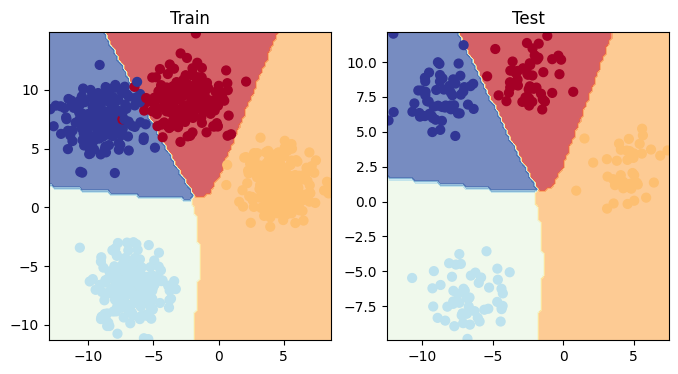

In [250]:
plot_model_classification(model)